In [1109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1110]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2021.csv")

In [1111]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [1112]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [1113]:
f4

,Date,CC
0,2021-03-26,0.0032
1,2021-03-27,0.0221
2,2021-03-28,0.0410
3,2021-03-29,0.0599
4,2021-03-30,0.0788
...,...,...
111,2021-07-15,92.3780
112,2021-07-16,92.9260
113,2021-07-17,93.4740
114,2021-07-18,94.0220


In [1114]:
data2 = f4[0:35].copy()

In [1115]:
data2

,Date,CC
0,2021-03-26,0.0032
1,2021-03-27,0.0221
2,2021-03-28,0.0410
3,2021-03-29,0.0599
4,2021-03-30,0.0788
5,2021-03-31,0.0977
6,2021-04-01,0.1166
7,2021-04-02,0.1355
8,2021-04-03,0.1544
9,2021-04-04,0.1733


In [1116]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [1117]:
data2.drop(['Date'], axis = 1,inplace = True)

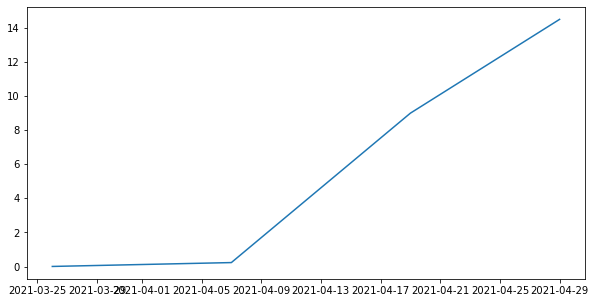

In [1118]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CC'])

In [1082]:
ad_fuller_result = adfuller(data2['CC'].loc['2021'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.932790608308608
p-value: 0.9985789866878944


In [954]:
# Diff by 2 value
data2['CC_log_1'] = data2['CC'].diff().diff()

In [1054]:
# Diff by 1 values
data2['CC_log'] = np.log(data2['CC'])
data2['CC_log_1'] = np.log(data2['CC']).diff()

In [1119]:
# Log and take difference of log
data2['CC_log'] = np.log(data2['CC'])
data2['CC_log_1'] = data2['CC_log'] - data2['CC_log'].diff()

In [1120]:
print (data2['CC_log_1'])

Date
2021-03-26         NaN
2021-03-27   -5.744604
2021-03-28   -3.812178
2021-03-29   -3.194183
2021-03-30   -2.815079
2021-03-31   -2.540842
2021-04-01   -2.325854
2021-04-02   -2.149006
2021-04-03   -1.998784
2021-04-04   -1.868209
2021-04-05   -1.752731
2021-04-06   -1.649219
2021-04-07   -1.555423
2021-04-08   -1.469676
2021-04-09   -0.040822
2021-04-10    0.524729
2021-04-11    0.883768
2021-04-12    1.147402
2021-04-13    1.355835
2021-04-14    1.528228
2021-04-15    1.675226
2021-04-16    1.803359
2021-04-17    1.916923
2021-04-18    2.018895
2021-04-19    2.111425
2021-04-20    2.196113
2021-04-21    2.255493
2021-04-22    2.311545
2021-04-23    2.364620
2021-04-24    2.415021
2021-04-25    2.463002
2021-04-26    2.508786
2021-04-27    2.552565
2021-04-28    2.594508
2021-04-29    2.634762
Name: CC_log_1, dtype: float64


In [1121]:
ad_fuller_result = adfuller(data2['CC_log_1'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.0261255268841545
p-value: 0.0012797221915888122


In [1122]:
data2 = data2.dropna()

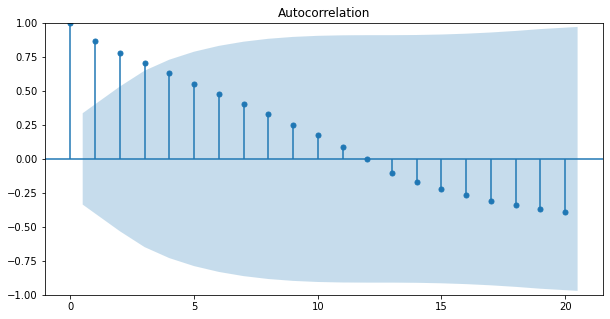

In [1123]:
sm.graphics.tsa.plot_acf(data2['CC_log_1'].values.squeeze(), lags=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


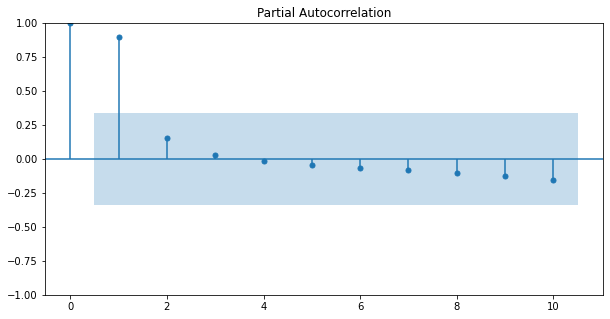

In [1124]:
sm.graphics.tsa.plot_pacf(data2['CC_log_1'].values.squeeze(), lags=10)
plt.show()

In [686]:
# p can be 1
# ACF is geometric so its an AR process (q = 0)

In [1125]:
train_data_1 = data2['CC_log']

In [1126]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (1,1,1))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [1127]:
model_pred = model_fit.forecast(steps = 81)

In [1128]:
model_pred

2021-04-30    2.704559
2021-05-01    2.731963
2021-05-02    2.756110
2021-05-03    2.777387
2021-05-04    2.796135
                ...   
2021-07-15    2.935107
2021-07-16    2.935109
2021-07-17    2.935111
2021-07-18    2.935112
2021-07-19    2.935114
Freq: D, Name: predicted_mean, Length: 81, dtype: float64

In [1129]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 CC_log   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -1.885
Date:                Tue, 16 Aug 2022   AIC                              9.771
Time:                        12:55:33   BIC                             14.260
Sample:                    03-27-2021   HQIC                            11.281
                         - 04-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8811      0.417      2.113      0.035       0.064       1.698
ma.L1         -0.4777      0.992     -0.482      0.630      -2.422       1.466
sigma2         0.0643      0.009      7.413      0.0

<AxesSubplot:xlabel='Date'>

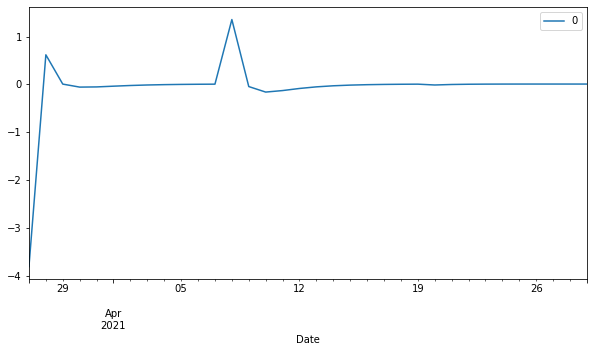

In [1130]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

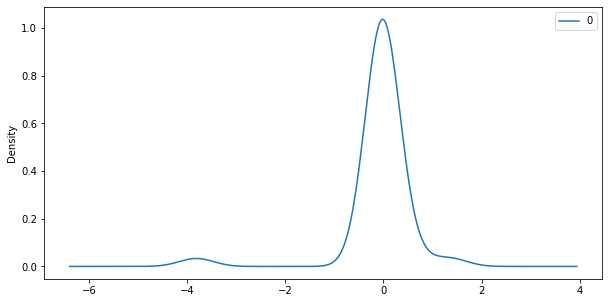

In [1131]:
residuals.plot(kind='kde')

In [1132]:
residuals.describe()

,0
count,34.000000
mean,-0.073941
std,0.709900
min,-3.812178
25%,-0.036015
50%,-0.001982
75%,0.005254
max,1.355256


In [1133]:
model_pred_1 = np.exp(model_pred)
model_pred_1

2021-04-30    14.947728
2021-05-01    15.363020
2021-05-02    15.738504
2021-05-03    16.076958
2021-05-04    16.381211
                ...    
2021-07-15    18.823525
2021-07-16    18.823559
2021-07-17    18.823590
2021-07-18    18.823616
2021-07-19    18.823640
Freq: D, Name: predicted_mean, Length: 81, dtype: float64

In [1098]:
test_data = f4['CC'].iloc[42:116]

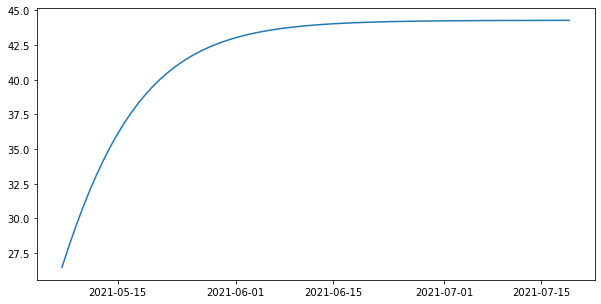

In [1099]:
plt.plot(model_pred_1)

In [1134]:
model_pred_1.to_csv('35_day_2021_CC.csv')

In [1101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data, model_pred_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 37.428
